In [1]:
# Numpy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Machine learning
import tensorflow as tf
import keras
import sklearn
import sklearn.preprocessing, sklearn.base, sklearn.utils, sklearn.metrics

# Various Python tricks and libraries
import requests
import time
import functools
import operator
import collections
from tqdm import tqdm_notebook

# My own libraries
import function_zoo

Using TensorFlow backend.


## Actual code

In [ ]:
# Get the data
_X = np.mgrid[-10:10.1:0.5, -10:10.1:0.5, -10:10.1:0.5].reshape(3, -1).T
_r = np.linalg.norm(_X, axis=-1)
_y = np.sin(np.pi * _r) * (1 / _r**2 - 2 / _r)

_X = _X[np.where(_r > 0.5)]
_y = _y[np.where(_r > 0.5)]

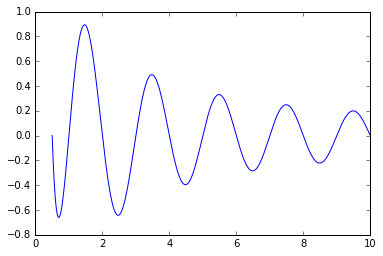

In [2]:
_r = np.mgrid[0.5:10:0.01].reshape(-1)
_y = np.sin(np.pi * _r) * (1 / _r**2 - 2 / _r)
plt.plot(_r, _y)

In [4]:
def r2_score(ytrue, ypred): # sklearn.metrics.r2_score in tensorflow. 1 output only. 

    ytrue_mean = tf.reduce_mean(ytrue, name="ytrue_mean")
    r2_score = tf.subtract(1., tf.truediv(tf.reduce_mean((ytrue - ypred) ** 2), tf.reduce_mean((ytrue - ytrue_mean) ** 2)), name="r2_score")
    return r2_score

class TqdmProgBar(keras.callbacks.Callback):
    def __init__(self, n_epochs, field='loss'):
        self.n_epochs = n_epochs
        self.field=field
    def on_train_begin(self, logs):
        self.pbar = tqdm_notebook(total=self.n_epochs)
    def on_train_end(self, logs):
        self.pbar.close()
    def on_epoch_end(self, epoch, logs):
        self.pbar.set_description("%.2f" %(logs[self.field]))
        self.pbar.update(1)

## Scripting

In [ ]:
_r_scaled_shaped = sklearn.preprocessing.StandardScaler().fit_transform(_r.reshape(-1,1))
_y_scaled_shaped = sklearn.preprocessing.StandardScaler().fit_transform(_y.reshape(-1,1))

G = keras.models.Sequential([
    keras.layers.Dense(units=15, activation="tanh", input_shape=(1,)),
    keras.layers.Dense(units=30, activation="tanh"),
    keras.layers.Dense(units=1, activation=None)
])
G.compile(loss='mse', optimizer=keras.optimizers.Adam(lr=0.001), metrics=[r2_score])
history = G.fit(
    x=_r_scaled_shaped, 
    y=_y_scaled_shaped, 
    epochs=1000, batch_size=32, shuffle=True, 
    verbose=0, callbacks=[TqdmProgBar(n_epochs=1000, field='r2_score')]
)
_yhat = G.predict(x=_r_scaled_shaped).reshape(-1)
plt.plot(_r_scaled_shaped, _y_scaled_shaped, _r_scaled_shaped, _yhat)

HBox(children=(IntProgress(value=0, max=1000), HTML(value=u'')))